# <center><ins> County level population by race ethicity 2010-2019 <ins></center>
***
##### Name: SREEPRATHAP M #####
##### Organization: Entri Elivate #####
***

### <left><ins>Overview of Problem Statement<ins><left>
The population by race and ethicity census data of 2010-2019 of 'US' is a collection of population of different ethnic groups like the white population, Asian population, Native American population, and so on. By predicting the major ethnic group or race population, we can identify which population of people contributes more to the country in various aspects.
***

### <left><ins>Objective<ins><left>
To figure out major ethnic group predictions using machine learning techniques.
***

### <left><ins>Data Description<ins><left>
###### Source:  
[County level population by race ethnicity 2010-2019](https://data.world/bdill/county-level-population-by-race-ethnicity-2010-2019)

###### Features:
(1).fips:- State and county FIPS code,  
(2).stfips:-  State FIPS code,  
(3).cofips:-  County FIPS code,  
(4).state_abbrev:-  Stae abbrevation,  
(5).state:-  State name,  
(6).county:-  County name,  
(7).year:-  Year,  
(8).pop:-  Total population(all races),  
(9).white_pop:-  White population,  
(10).black_pop:-  Black population,  
(11).asian_pop:-  Asian population,  
(12).indian_pop:-  Naive American or Alaska native population,  
(13).pacific_pop:-  Native Hawaiian or other Pacific islander Population,  
(14).two_pop:-  Tow or more races population,  
(15).not_hisp_pop:-  Non-Hispanic population (independent of race),  
(16).hisp_pop:-  Hispanic population(independent of race)  
***

### <left><ins>Data Collection<ins></left>
***

In [129]:
# importing library 
import numpy as np
import pandas as pd

In [130]:
# Reading downloded Dataset from loacl directory
data = pd.read_csv('US_county_census_est_race_eth_2010_2019.csv')
# Converging Data to panda DataFrame
df = pd.DataFrame(data)

In [133]:
## For result and title printing, create a custom definition. 
def print_title(title):
    print(f'\n{'-'*60}\n\033[1m{title}\033[0m')
def print_section(title):
    print(f'{'-'*60}\n{title}\n{'-'*60}')

In [135]:
df.head(3)

,FIPS,STFIPS,COFIPS,state_abbrev,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
0,1001,1,1,AL,Alabama,Autauga,2010,54571,43297,9689,484,258,47,796,53261,1310
1,1001,1,1,AL,Alabama,Autauga,2011,55227,43699,9883,514,261,51,819,53888,1339
2,1001,1,1,AL,Alabama,Autauga,2012,54954,43315,9949,552,275,44,819,53639,1315


In [137]:
df.tail(3)

,FIPS,STFIPS,COFIPS,state_abbrev,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
31407,56045,56,45,WY,Wyoming,Weston,2017,6968,6558,44,97,114,2,153,6681,287
31408,56045,56,45,WY,Wyoming,Weston,2018,6924,6474,47,109,125,2,167,6651,273
31409,56045,56,45,WY,Wyoming,Weston,2019,6927,6454,48,117,131,2,175,6642,285


***
### <left><ins>Data Preprocessing - Data Cleaing<ins><left>
***

In [140]:
df1 = pd.DataFrame(df)
print_section(f'Since column "state_abbrev" and "state" columns are same, \ndorping "state_abbrev" columns and creating df1 the from datafrme')
df1 = df1.drop("state_abbrev", axis=1)
print_section("DataFrame after dropping the column")
df1.head(3)

------------------------------------------------------------
Since column "state_abbrev" and "state" columns are same, 
dorping "state_abbrev" columns and creating df1 the from datafrme
------------------------------------------------------------
------------------------------------------------------------
DataFrame after dropping the column
------------------------------------------------------------


,FIPS,STFIPS,COFIPS,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
0,1001,1,1,Alabama,Autauga,2010,54571,43297,9689,484,258,47,796,53261,1310
1,1001,1,1,Alabama,Autauga,2011,55227,43699,9883,514,261,51,819,53888,1339
2,1001,1,1,Alabama,Autauga,2012,54954,43315,9949,552,275,44,819,53639,1315


In [142]:
# data frme information
print_title("DataFrame Information")
print_section(df1.info())


------------------------------------------------------------
DataFrame Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31410 entries, 0 to 31409
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FIPS          31410 non-null  int64 
 1   STFIPS        31410 non-null  int64 
 2   COFIPS        31410 non-null  int64 
 3   state         31410 non-null  object
 4   county        31410 non-null  object
 5   year          31410 non-null  int64 
 6   pop           31410 non-null  int64 
 7   white_pop     31410 non-null  int64 
 8   black_pop     31410 non-null  int64 
 9   asian_pop     31410 non-null  int64 
 10  indian_pop    31410 non-null  int64 
 11  pacific_pop   31410 non-null  int64 
 12  two_pop       31410 non-null  int64 
 13  not_hisp_pop  31410 non-null  int64 
 14  hisp_pop      31410 non-null  int64 
dtypes: int64(13), object(2)
memory usage: 3.6+ MB
------------------------------------------

In [143]:
# Data frame Description
print_title("DataFrame Description")
print_section(df1.describe())


------------------------------------------------------------
DataFrame Description
------------------------------------------------------------
               FIPS        STFIPS        COFIPS          year           pop  \
count  31410.000000  31410.000000  31410.000000  31410.000000  3.141000e+04   
mean   30389.820121     30.286215    103.605540   2014.500000  1.014097e+05   
std    15158.803727     15.140671    107.690218      2.872327  3.251245e+05   
min     1001.000000      1.000000      1.000000   2010.000000  8.200000e+01   
25%    18179.000000     18.000000     35.000000   2012.000000  1.098500e+04   
50%    29177.000000     29.000000     79.000000   2014.500000  2.573350e+04   
75%    45081.000000     45.000000    133.000000   2017.000000  6.741675e+04   
max    56045.000000     56.000000    840.000000   2019.000000  1.010571e+07   

          white_pop     black_pop     asian_pop     indian_pop   pacific_pop  \
count  3.141000e+04  3.141000e+04  3.141000e+04   31410.000000 

In [145]:
# Finding null value for each features
print_title("Null values in DataFrame")
print_section(df1.isnull().sum())


------------------------------------------------------------
Null values in DataFrame
------------------------------------------------------------
FIPS            0
STFIPS          0
COFIPS          0
state           0
county          0
year            0
pop             0
white_pop       0
black_pop       0
asian_pop       0
indian_pop      0
pacific_pop     0
two_pop         0
not_hisp_pop    0
hisp_pop        0
dtype: int64
------------------------------------------------------------


In [148]:
# Features data type 
print_title("Data Types of Dataframe Varible columns")
print_section(df1.dtypes)


------------------------------------------------------------
Data Types of Dataframe Varible columns
------------------------------------------------------------
FIPS             int64
STFIPS           int64
COFIPS           int64
state           object
county          object
year             int64
pop              int64
white_pop        int64
black_pop        int64
asian_pop        int64
indian_pop       int64
pacific_pop      int64
two_pop          int64
not_hisp_pop     int64
hisp_pop         int64
dtype: object
------------------------------------------------------------


In [150]:
# Finding Duplicated valus 
print_section(f"Duplicated values: {df1.duplicated().sum()}")

------------------------------------------------------------
Duplicated values: 0
------------------------------------------------------------


##### Outlier Removel

In [153]:
# Creating custom definition to remove outliers using IQR method
def outliers(data):
    for col in data.select_dtypes(include=['int64','float64']).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5*IQR)
        upper = Q3 + (1.5*IQR)

        # Capping
        data[col] = data[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return data

In [155]:
df2 = pd.DataFrame(df1) # data frame after outlier remove
outliers(df2)

,FIPS,STFIPS,COFIPS,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
0,1001,1,1.0,Alabama,Autauga,2010,54571.0,43297.0,9689.0,484.0,258.0,47.0,796.0,53261.0,1310.0
1,1001,1,1.0,Alabama,Autauga,2011,55227.0,43699.0,9883.0,514.0,261.0,51.0,819.0,53888.0,1339.0
2,1001,1,1.0,Alabama,Autauga,2012,54954.0,43315.0,9949.0,552.0,275.0,44.0,819.0,53639.0,1315.0
3,1001,1,1.0,Alabama,Autauga,2013,54727.0,42943.0,9984.0,561.0,279.0,46.0,914.0,53363.0,1364.0
4,1001,1,1.0,Alabama,Autauga,2014,54893.0,42945.0,10103.0,573.0,279.0,50.0,943.0,53461.0,1432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31405,56045,56,45.0,Wyoming,Weston,2015,7208.0,6835.0,39.0,81.0,107.0,2.0,144.0,6923.0,285.0
31406,56045,56,45.0,Wyoming,Weston,2016,7220.0,6826.0,38.0,88.0,108.0,2.0,158.0,6924.0,296.0
31407,56045,56,45.0,Wyoming,Weston,2017,6968.0,6558.0,44.0,97.0,114.0,2.0,153.0,6681.0,287.0
31408,56045,56,45.0,Wyoming,Weston,2018,6924.0,6474.0,47.0,109.0,125.0,2.0,167.0,6651.0,273.0


##### Skewness

In [158]:
skewness = df2.select_dtypes(include = ['int64','float64']).skew()
print_section("\033[1mSkewness of numerical Features \033[0m")
print_section(skewness)

------------------------------------------------------------
Skewness of numerical Features 
------------------------------------------------------------
------------------------------------------------------------
FIPS           -0.080233
STFIPS         -0.082250
COFIPS          0.968919
year            0.000000
pop             1.148729
white_pop       1.164347
black_pop       1.221158
asian_pop       1.203443
indian_pop      1.158144
pacific_pop     1.198770
two_pop         1.190157
not_hisp_pop    1.168889
hisp_pop        1.208730
dtype: float64
------------------------------------------------------------


***
### <left><ins>Exploratory Data analysis (EDA)<ins><left>
***

In [161]:
# Importing the plotting library  
import matplotlib.pyplot as plt
import seaborn as sns

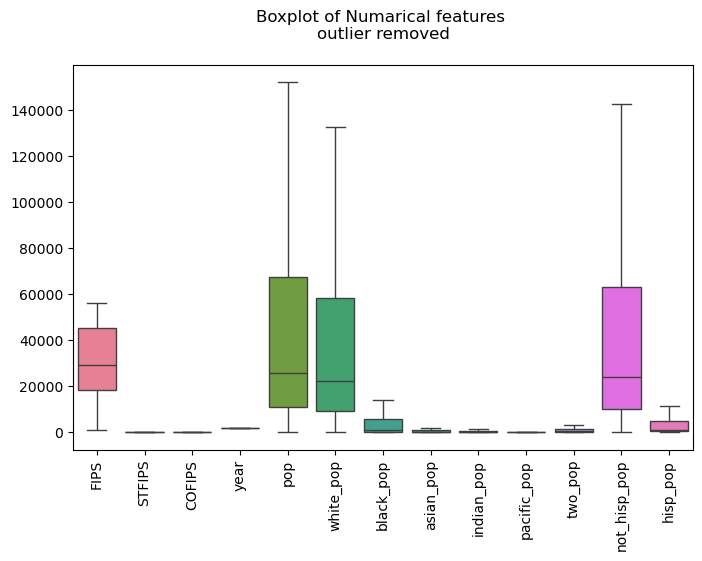

In [163]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df2)
plt.title(f'''Boxplot of Numarical features 
outlier removed
''')
plt.xticks(rotation = 90)
plt.show()

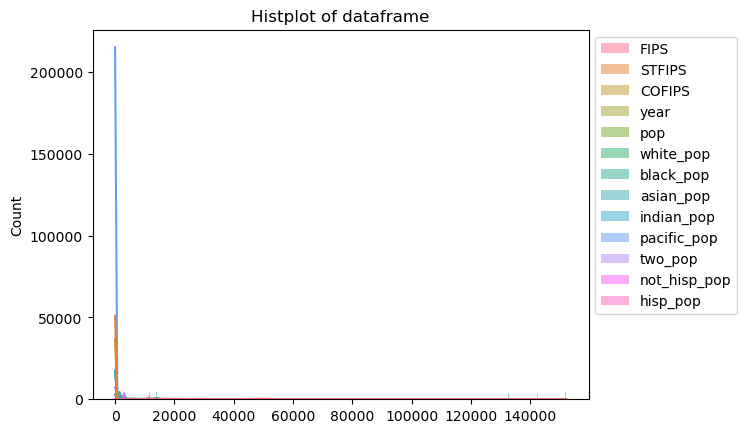

In [164]:
ax=sns.histplot(df2,kde=True,linewidth=0,legend=True)
plt.title('Histplot of dataframe')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

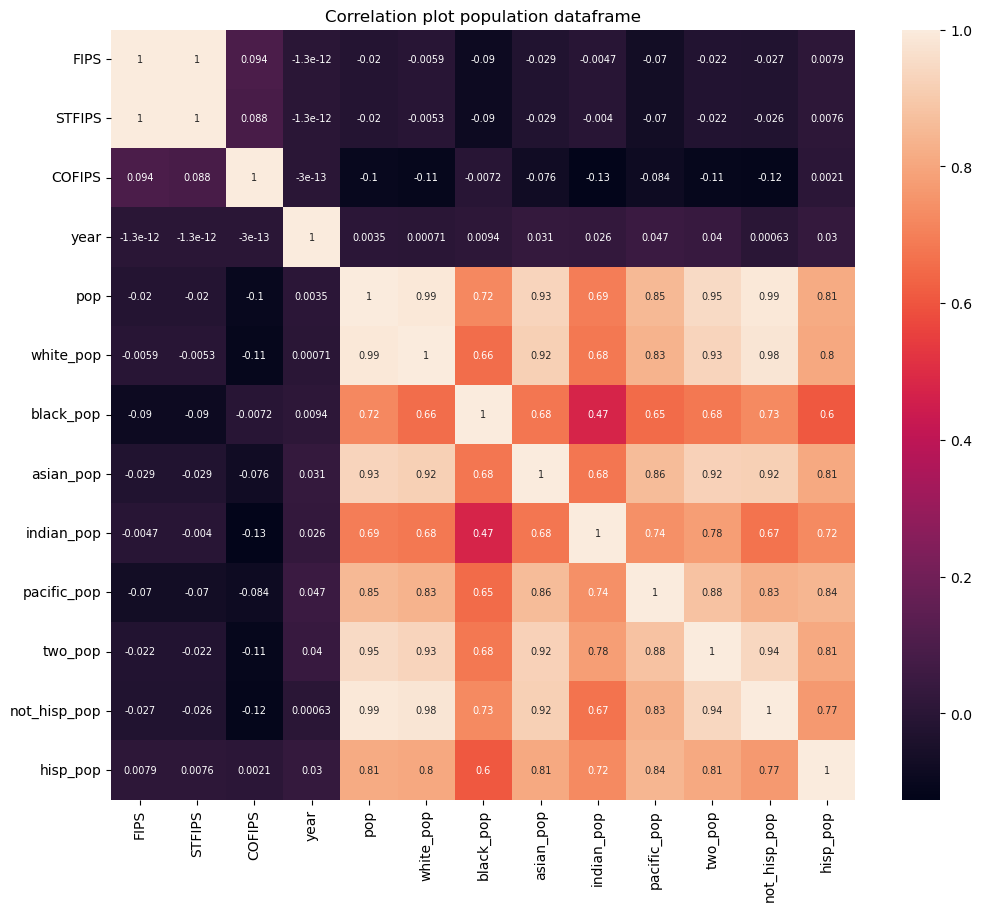

In [165]:
#correlation of data frame 
cor_df = df2.select_dtypes(include = ['int64','float64']).corr()
#correlation plot
plt.figure(figsize=(12,10))
sns.heatmap(cor_df,annot=True,annot_kws={'size': 7})
plt.title('Correlation plot population dataframe')
plt.show()

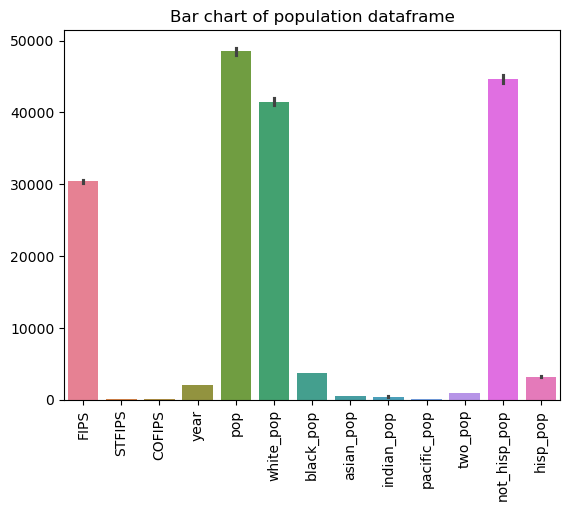

In [166]:
# Barchard for data visualization
nu_col=df2.select_dtypes(include=['int64','float64'])
df3 = pd.DataFrame(df2.select_dtypes(include=['int64','float64']))
sns.barplot(data=df3)
plt.xticks(rotation = 90)
plt.title('Bar chart of population dataframe')
plt.show()

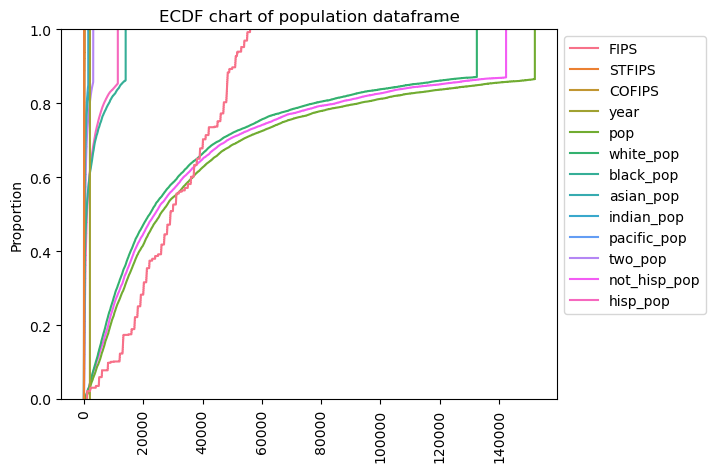

In [168]:
# ECDF cahrt for data visualization
ax=sns.ecdfplot(data=df3,legend=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation = 90)
plt.title('ECDF chart of population dataframe')
plt.show()

***
### <left><ins>Feature Engineering<ins><left>
***
##### Encoding
###### Encoding of object-type columns

In [182]:
# importing category encoder from library 
from category_encoders import TargetEncoder

In [184]:
df4 = pd.DataFrame(df2)
## finding Object type columns and count the number of unique values
col_object_type=df4.select_dtypes(include=['object']).columns.tolist()
print_title('Object type columns in DataFrame')
print_section(pd.DataFrame({'Colums':col_object_type}))
print_title('Counted unique values in object type columns')
for column_name in col_object_type:
  print(f'{column_name} has {df4[column_name].nunique()} unique values')


------------------------------------------------------------
Object type columns in DataFrame
------------------------------------------------------------
   Colums
0   state
1  county
------------------------------------------------------------

------------------------------------------------------------
Counted unique values in object type columns
state has 50 unique values
county has 1876 unique values


In [186]:
print_title('Aggrigation of Cont and Mean of object type column to target column')
for column_name in col_object_type:
    print_section(df4['pop'].groupby(df4[column_name]).agg(['count','mean']))


------------------------------------------------------------
Aggrigation of Cont and Mean of object type column to target column
------------------------------------------------------------
                count           mean
state                               
Alabama           670   54314.985821
Alaska            290   20300.575000
Arizona           150  101803.436667
Arkansas          750   34223.004333
California        580  107221.903879
Colorado          640   39205.986328
Connecticut        80  147631.015625
Delaware           30  152064.375000
Florida           670   94364.632090
Georgia          1590   42915.739072
Hawaii             50  105304.565000
Idaho             440   29997.327273
Illinois         1020   47549.117402
Indiana           920   52840.632065
Iowa              990   27400.281061
Kansas           1050   19803.138095
Kentucky         1200   30299.577708
Louisiana         640   54741.042188
Maine             160   71594.773438
Maryland          240  101035.48

In [188]:
print_section(f'Since high cardinality in state and county coluns Target\nEncoding is moste prefered')
encoder=TargetEncoder()

------------------------------------------------------------
Since high cardinality in state and county coluns Target
Encoding is moste prefered
------------------------------------------------------------


In [190]:
df5 = pd.DataFrame(df4)
df4.head(3)

,FIPS,STFIPS,COFIPS,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
0,1001,1,1.0,Alabama,Autauga,2010,54571.0,43297.0,9689.0,484.0,258.0,47.0,796.0,53261.0,1310.0
1,1001,1,1.0,Alabama,Autauga,2011,55227.0,43699.0,9883.0,514.0,261.0,51.0,819.0,53888.0,1339.0
2,1001,1,1.0,Alabama,Autauga,2012,54954.0,43315.0,9949.0,552.0,275.0,44.0,819.0,53639.0,1315.0


In [192]:
print_section(f'Since high cardinality in state and county coluns Target\nEncoding is moste prefered')
encoder.fit(df4['state'],df4['pop'])
df5['state'] = encoder.transform(df4['state'],df4['pop'])
encoder.fit(df4['county'],df4['pop'])
df5['county'] = encoder.transform(df4['county'],df4['pop'])
df5.head(3)

------------------------------------------------------------
Since high cardinality in state and county coluns Target
Encoding is moste prefered
------------------------------------------------------------


,FIPS,STFIPS,COFIPS,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
0,1001,1,1.0,54314.985821,50281.243963,2010,54571.0,43297.0,9689.0,484.0,258.0,47.0,796.0,53261.0,1310.0
1,1001,1,1.0,54314.985821,50281.243963,2011,55227.0,43699.0,9883.0,514.0,261.0,51.0,819.0,53888.0,1339.0
2,1001,1,1.0,54314.985821,50281.243963,2012,54954.0,43315.0,9949.0,552.0,275.0,44.0,819.0,53639.0,1315.0


***
### <left><ins>Feature Scaling<ins><left>
***
##### Min Max scaling 

In [195]:
# importing MinMaxScaler library for feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [197]:
df6 = pd.DataFrame(df5)

In [199]:
scaling=MinMaxScaler()
numerical_col = df6.select_dtypes(include=['int64','float64'])
df6 = scaling.fit_transform(numerical_col)
df6=pd.DataFrame(df6, columns=numerical_col.columns, index=df2.index) #datafrme after min max scaling

##### PowerTransformer

In [202]:
# importing powertransformer library
from sklearn.preprocessing import PowerTransformer

In [204]:
pt = PowerTransformer(method='yeo-johnson',standardize=True)
numeriacal_features = df6.select_dtypes(include=['int64','float64']).columns
df6[numeriacal_features] = pt.fit_transform(df6[numeriacal_features])

In [206]:
df6.head(5)

,FIPS,STFIPS,COFIPS,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
0,-1.928755,-1.92287,-1.726894,0.458593,0.274188,-1.610567,0.616111,0.527443,1.420259,0.566839,0.027344,0.736118,0.396247,0.681851,-0.206047
1,-1.928755,-1.92287,-1.726894,0.458593,0.274188,-1.230735,0.629712,0.537918,1.432322,0.625005,0.038246,0.815201,0.426110,0.695071,-0.189355
2,-1.928755,-1.92287,-1.726894,0.458593,0.274188,-0.860716,0.624072,0.527914,1.436322,0.693883,0.088048,0.671755,0.426110,0.689842,-0.203157
3,-1.928755,-1.92287,-1.726894,0.458593,0.274188,-0.499397,0.619361,0.518138,1.438423,0.709458,0.101961,0.715168,0.541688,0.684014,-0.175104
4,-1.928755,-1.92287,-1.726894,0.458593,0.274188,-0.145869,0.622808,0.518191,1.445458,0.729805,0.101961,0.796112,0.574637,0.686087,-0.136978


In [208]:
skewness = df6.skew()
print_section("\033[1mSkewness of Features in dataframe after Scaling\033[0m")
print_section(skewness)

------------------------------------------------------------
Skewness of Features in dataframe after Scaling
------------------------------------------------------------
------------------------------------------------------------
FIPS           -0.070539
STFIPS         -0.071084
COFIPS          0.098267
state           0.033800
county         -0.000077
year           -0.066401
pop             0.336701
white_pop       0.336056
black_pop       0.557582
asian_pop       0.554942
indian_pop      0.438283
pacific_pop     0.486517
two_pop         0.444147
not_hisp_pop    0.335262
hisp_pop        0.505745
dtype: float64
------------------------------------------------------------


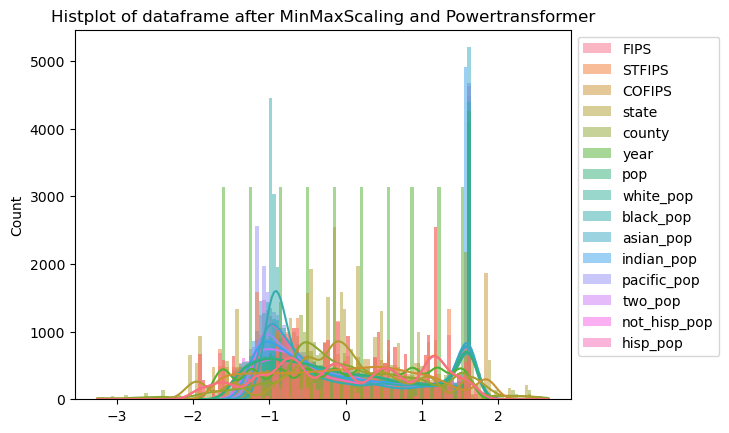

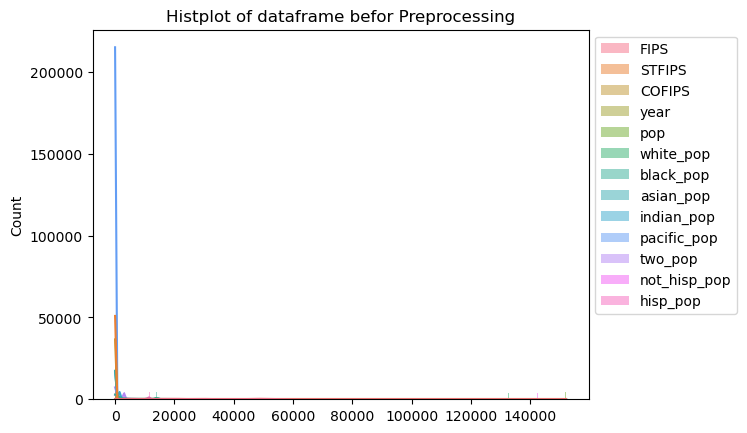

In [46]:
ax=sns.histplot(df6,kde=True,linewidth=0,legend=True)
plt.title('Histplot of dataframe after MinMaxScaling and Powertransformer')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

ax=sns.histplot(df2,kde=True,linewidth=0,legend=True)
plt.title('Histplot of dataframe befor Preprocessing')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

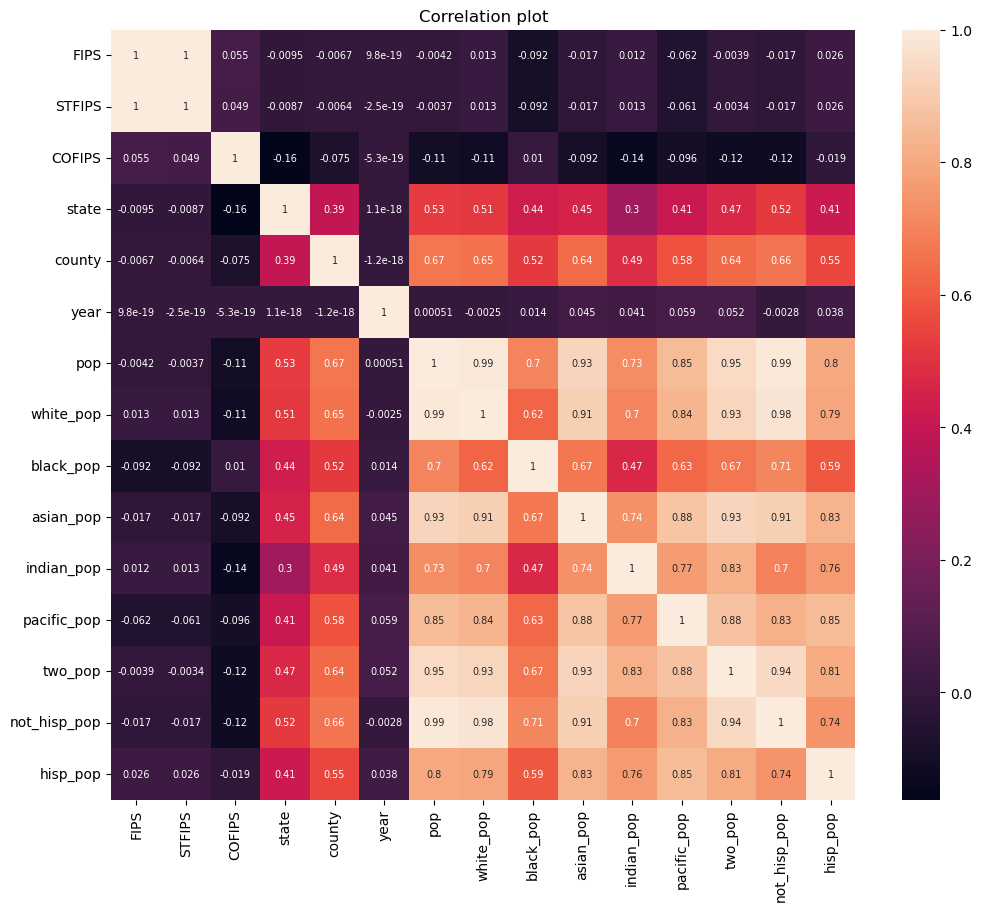

In [47]:
#correlation of data frame after feature scaling
cor_df = df6.corr()
#correlation plot
plt.figure(figsize=(12,10))
sns.heatmap(cor_df,annot=True,annot_kws={'size': 7})
plt.title('Correlation plot')
plt.show()

***
### <left><ins>Feature Selection<ins><left>
***

In [210]:
# importing SelectKBest library for feature selection
from sklearn.feature_selection import SelectKBest,f_regression

In [212]:
#converting df6 to new dataset name for futher process
df_pop = pd.DataFrame(df6)

In [214]:
x = df_pop.drop('pop', axis=1)
y = df_pop['pop']

In [216]:
sk = SelectKBest(score_func=f_regression,k=14)
x_new = sk.fit_transform(x,y)

In [218]:
#Get selected feture names and scores
selected_features = x.columns[sk.get_support()]
features_scores = pd.DataFrame({'feature':x.columns,'Score':sk.scores_}).sort_values(by='Score',ascending=False)

print_title('Selected Features:')
print_section(pd.DataFrame(list(selected_features)))
print_title("\nFeature Scores:")
print_section(features_scores)


------------------------------------------------------------
Selected Features:
------------------------------------------------------------
               0
0           FIPS
1         STFIPS
2         COFIPS
3          state
4         county
5           year
6      white_pop
7      black_pop
8      asian_pop
9     indian_pop
10   pacific_pop
11       two_pop
12  not_hisp_pop
13      hisp_pop
------------------------------------------------------------

------------------------------------------------------------

Feature Scores:
------------------------------------------------------------
         feature         Score
12  not_hisp_pop  1.540729e+06
6      white_pop  1.164183e+06
11       two_pop  2.898884e+05
8      asian_pop  1.947178e+05
10   pacific_pop  8.474241e+04
13      hisp_pop  5.658111e+04
9     indian_pop  3.518288e+04
7      black_pop  3.100110e+04
4         county  2.508289e+04
3          state  1.200154e+04
2         COFIPS  3.584230e+02
0           FIPS  5.526506e-01

In [220]:
x_select=x[selected_features]

In [222]:
x_select.columns

Index(['FIPS', 'STFIPS', 'COFIPS', 'state', 'county', 'year', 'white_pop',
       'black_pop', 'asian_pop', 'indian_pop', 'pacific_pop', 'two_pop',
       'not_hisp_pop', 'hisp_pop'],
      dtype='object')

***
### <left><ins>Feature Scaling<ins><left>
***

In [263]:
# importing standardScaler from library
from sklearn.preprocessing import StandardScaler

In [265]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_select)

***
### <left><ins>Split data into Training and Testing Sets<ins><left>
***

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

In [267]:
# Split data into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [269]:
print(f"""
shape x_train: {x_train.shape}
shape x_test: {x_test.shape}
shape y_train: {y_train.shape}
shape y_test: {y_test.shape}""")


shape x_train: (25128, 14)
shape x_test: (6282, 14)
shape y_train: (25128,)
shape y_test: (6282,)


***
### <left><ins>ML Model<ins><left>
***

In [271]:
# Creating a dictinary named models for model selection 
models = {
    '1.linear Regression':LinearRegression(),
    '2.Dicision Tree Regression':DecisionTreeRegressor(),
    '3.Random Forest Regressor':RandomForestRegressor(),
    '4.Gradient Boosting Regressor':GradientBoostingRegressor(),
    '5.Support Vector Regressor':SVR()
}

In [273]:
# This for loop syntax fit the x train and y train for each moledl in modles dictionary and stores as reslult dictinary 
result = {}
for model_name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    result[model_name] = {'mae':mae, 'mse':mse,'rmse':rmse,'r2':r2}

***
### <left><ins>Model Evaluation<ins><left>
***

In [275]:
result_df = pd.DataFrame(result).T
print_title('Score details for variuse modles')
print_section(result_df)


------------------------------------------------------------
Score details for variuse modles
------------------------------------------------------------
                                    mae       mse      rmse        r2
1.linear Regression            0.041690  0.005840  0.076422  0.994167
2.Dicision Tree Regression     0.004402  0.000273  0.016525  0.999727
3.Random Forest Regressor      0.002183  0.000041  0.006410  0.999959
4.Gradient Boosting Regressor  0.017996  0.000744  0.027274  0.999257
5.Support Vector Regressor     0.044232  0.002742  0.052367  0.997261
------------------------------------------------------------


##### Cross-validating with Random forest regressor to find andy over fitting

In [309]:
from sklearn.model_selection import cross_val_score

In [317]:
cross_val_score(RandomForestRegressor(),x,y,cv=10)

array([0.99882041, 0.99984356, 0.99994744, 0.9999695 , 0.9998864 ,
       0.99887638, 0.99988298, 0.9999562 , 0.96447591, 0.99907854])

***
### <left><ins>Hyperparameter turning<left><ins>
***

In [277]:
rfg = RandomForestRegressor(random_state=42,
                            n_estimators=50,
                            max_depth=10,
                            min_samples_split=5,
                            min_samples_leaf=2,
                            max_features='sqrt',
                            ccp_alpha=0.1,
                            n_jobs=-1)

In [279]:
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [281]:
RandomGrid = RandomizedSearchCV(estimator = rfg,
                                param_distributions=param_grid,
                                cv=10,
                                scoring = 'r2',
                                n_jobs=-1,
                                verbose=2)

In [283]:
RandomGrid.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(ccp_alpha=0.1, max_depth=10,
                                                   max_features='sqrt',
                                                   min_samples_leaf=2,
                                                   min_samples_split=5,
                                                   n_estimators=50, n_jobs=-1,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='r2', verbose=2)

In [285]:
print("Best Parameters:",RandomGrid.best_params_)
print("best R2 Score:",RandomGrid.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
best R2 Score: 0.8908366788793239
